### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
df1=pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Data Exploration

In [3]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Data Preprocessing

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

We can see from above area_type has 4 category and not much usefull so dropping it together
with society , balcony and availability

In [8]:
df2=df1.drop(['society' , 'availability' ,'balcony' ,'area_type'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


Number of null values in out datafrme df2

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2.shape

(13320, 5)

In [12]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3.shape

(13246, 5)

In [14]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
 df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

* Creating a new column name bhk and puting the corresponding values of size only numeric part

In [16]:
df3['size'].astype(str)

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

In [17]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(" ")[0]))
df3.drop(['size'],axis='columns',inplace=True)
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [18]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
df3[df3.bhk>20].head()

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


* We can see that we have two rows with 27 and 43 bhk in which in 43 bhk for 2400 sqft looks odd and are outliers
so dropping them

In [20]:
df3.drop(df3[(df3['bhk'] >20)].index, inplace=True)

df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [21]:
df3[df3.bhk>20].head()       # Dropped 

,location,total_sqft,bath,price,bhk


In [22]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
df3.loc[1000:1050]

,location,total_sqft,bath,price,bhk
1000,Raja Rajeshwari Nagar,600,1.0,22.00,1
1001,Haralur Road,1810,3.0,100.00,3
1002,Indira Nagar,1200,2.0,93.00,2
1003,Harlur,1033,2.0,49.00,2
1004,ITPL,1548,3.0,89.50,3
1005,Horamavu Banaswadi,1611,3.0,66.00,3
1006,Electronic City Phase II,1400,2.0,40.43,3
1007,Vidyaranyapura,1485,2.0,67.00,3
1008,Margondanahalli,2400,2.0,82.00,2
1009,Pattandur Agrahara,1025,2.0,44.50,2


In [24]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
df3[df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
5,Whitefield,1170,2.0,38.00,2
6,Old Airport Road,2732,4.0,204.00,4
7,Rajaji Nagar,3300,4.0,600.00,4
8,Marathahalli,1310,3.0,63.25,3
9,Gandhi Bazar,1020,6.0,370.00,6


In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13244 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13244 non-null  object 
 1   total_sqft  13244 non-null  object 
 2   bath        13244 non-null  float64
 3   price       13244 non-null  float64
 4   bhk         13244 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [27]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


* We can see above that there are some values which are in range so we will be taking average of the two numbers given in range and replace the range with new number created

In [28]:
def range_to_num(x):
    tokens=x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
range_to_num('2166')

2166.0

In [30]:
range_to_num('2100-2850')

2475.0

In [31]:
range_to_num('34.46sq meter')    # As return none for other cases

In [32]:
df4=df3.copy()

In [33]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [34]:
df4['total_sqft']=df4['total_sqft'].apply(range_to_num)

In [35]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [36]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13244 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13244 non-null  object 
 1   total_sqft  13198 non-null  float64
 2   bath        13244 non-null  float64
 3   price       13244 non-null  float64
 4   bhk         13244 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB


In [37]:
df4.drop(df4[df4.total_sqft.isnull()].index,inplace=True)

In [38]:
df4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

### Feature Engineering
* Using total_sqft and price to calculate the price per unit area using feature engineering and creating a new feature price_per_sqft and storing in it 

In [39]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


Now focussing on location

In [40]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [41]:
len(df5.location.unique())

1297

In [42]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count')
loaction_stats=location_stats.sort_values(ascending=False)
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1286, dtype: int64

We can see in few places number of houses bought or sold is less 

In [43]:
len(location_stats[location_stats<10])

1032

In [44]:
location_stats_less_than_10=location_stats[location_stats<10]
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1032, dtype: int64

In [45]:
len(df5.location.unique())

1286

In [46]:
df5.location=df5.location.apply(lambda x: 'others' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

255

In [47]:
df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13198.000000,13198.000000,13198.000000,13198.000000,1.319800e+04
mean,1554.750472,2.686468,112.225757,2.795954,7.919658e+03
std,1236.122856,1.281675,149.107561,1.226723,1.067351e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267910e+03
50%,1275.000000,2.000000,71.805000,3.000000,5.438331e+03
75%,1671.500000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,18.000000,3600.000000,19.000000,1.200000e+07


In [48]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


### Outlier Analysis and removal

In [49]:
df5[df5.total_sqft/df5.bhk < 250].head()
# As total area in square feet less than 250 per bhk, which is simply not possible so it's outlier

,location,total_sqft,bath,price,bhk,price_per_sqft
9,others,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,others,500.0,3.0,100.0,3,20000.000000


In [50]:
df5.shape

(13198, 6)

In [51]:
df6=df5[~(df5.total_sqft/df5.bhk < 250)]
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [52]:
df6[df6.total_sqft/df6.bhk < 250].head()

,location,total_sqft,bath,price,bhk,price_per_sqft


* All such rows has been removed because they were irrelevent or seemed mistakes

In [53]:
df6.shape

(12587, 6)

In [54]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12587 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12587 non-null  object 
 1   total_sqft      12587 non-null  float64
 2   bath            12587 non-null  float64
 3   price           12587 non-null  float64
 4   bhk             12587 non-null  int64  
 5   price_per_sqft  12587 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 688.4+ KB


In [55]:
df6.price_per_sqft.describe()

count     12587.000000
mean       6353.119961
std        4209.999818
min         267.829813
25%        4217.096349
50%        5302.325581
75%        6969.394274
max      176470.588235
Name: price_per_sqft, dtype: float64

* looking above we can see there are some absurd values like approximately no one will sell homes in price_per_sqft around 300 or below and neither one would buy a house with price_per_sqft near around the max as given so these are outliers for us.
* Below we are removing all the rows which deviates by more than one standard deviation

In [56]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
# Considering the one standard deviation to the mean as desirable range

In [57]:
df7=remove_pps_outliers(df6)

In [58]:
df7.shape

(10371, 6)

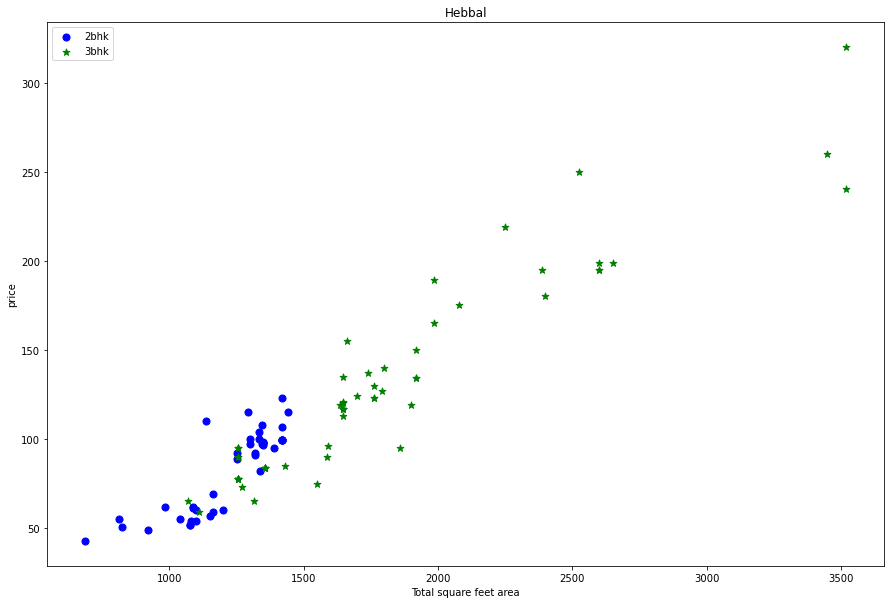

In [59]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*',color='green',label='3bhk',s=50)
    plt.xlabel('Total square feet area')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,'Hebbal')

* From above plot we can see that at few places price of 2bhk is going higher than 3 bhk so these are also outliers so handling them now

In [60]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={'mean':np.mean(bhk_df.price_per_sqft),
                           'std':np.std(bhk_df.price_per_sqft),
                           'count':bhk_df.shape[0]}
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if(stats and stats['count']>5):
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [61]:
df8=remove_bhk_outliers(df7)
df8.shape

(7467, 6)

In [62]:
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


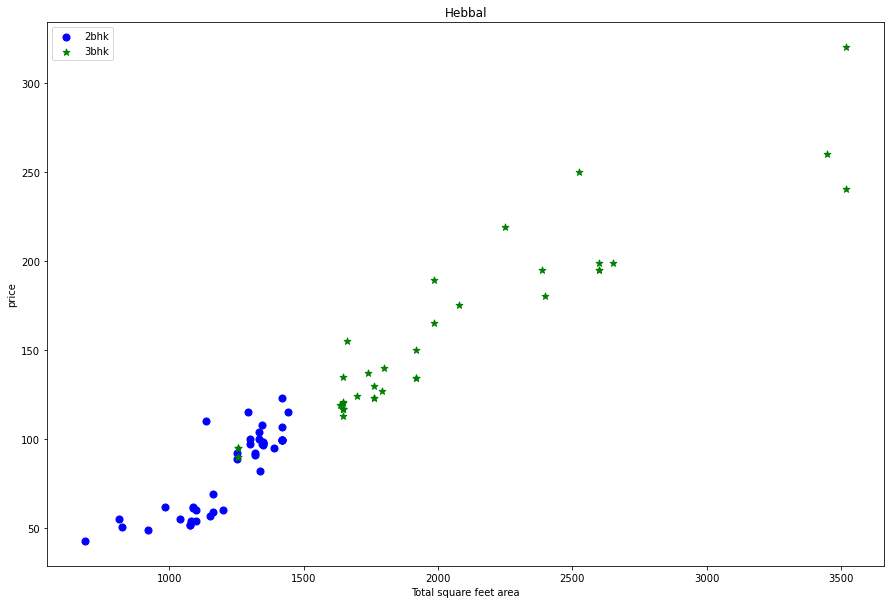

In [63]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'count')

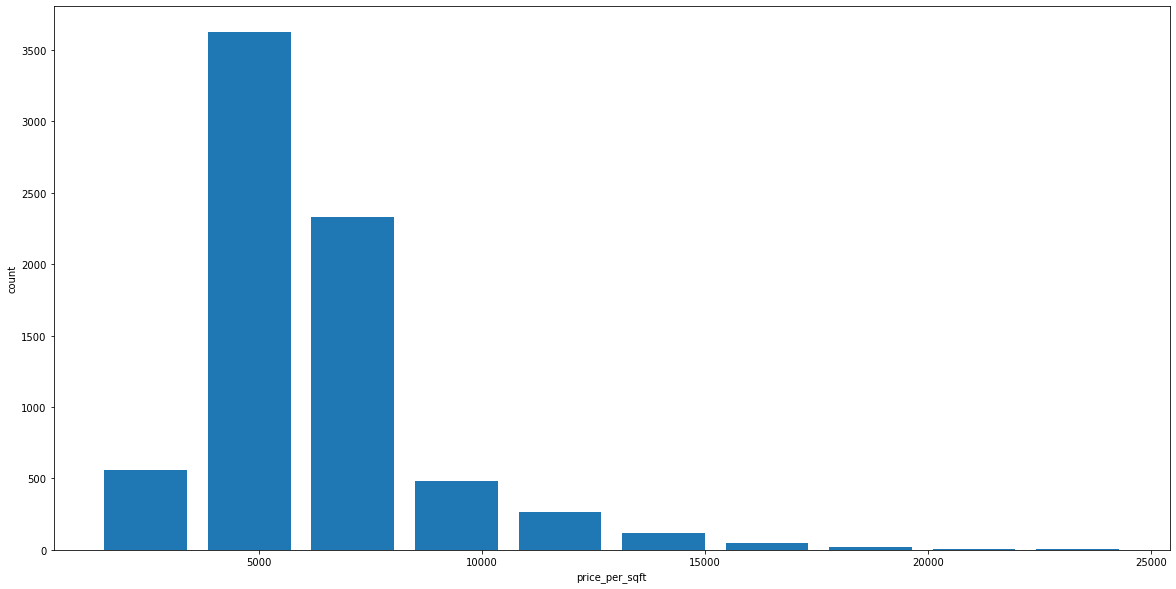

In [64]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

* most of the houses sold lie in range between 5000 to 8000 rs per_sqft

In [65]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  9.,  7., 12., 16., 13.])

In [66]:
df8[df8.bath>10].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
591,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
5430,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8668,others,12000.0,12.0,525.0,10,4375.000000
8754,others,10000.0,16.0,550.0,16,5500.000000
9462,others,6000.0,12.0,150.0,11,2500.000000


Text(0, 0.5, 'Count')

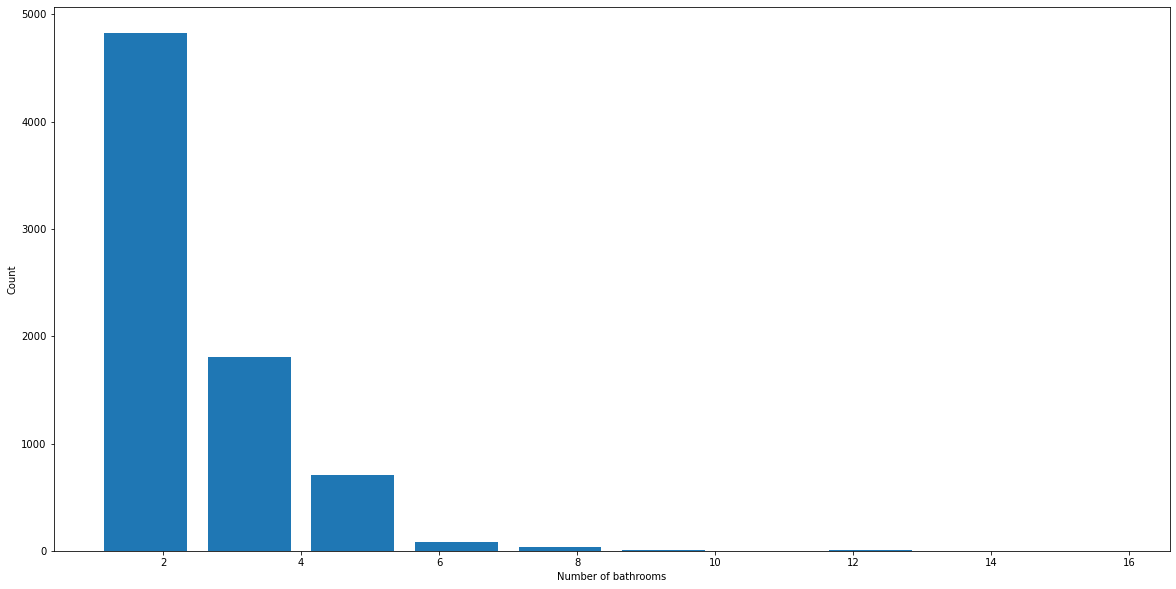

In [67]:
plt.hist(df8.bath,rwidth=0.8)
matplotlib.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

* Assume you have bought a home of 4 bhk then atmost it can have attached bathroom to all rooms so 4 bath plus 1 in hall and for safe side we take 1 more bath so any home can't have bathrooms more than bhk+2 so removing such kind of outliers

In [68]:
df8[df8.bath>(df8.bhk+2)]    # We can se there are many such houses

,location,total_sqft,bath,price,bhk,price_per_sqft
591,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
1551,Chamrajpet,1500.0,9.0,230.0,6,15333.333333
1684,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5390,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6897,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8597,others,11338.0,9.0,1000.0,6,8819.897689


In [69]:
df9=df8[df8.bath<(df8.bhk+2)]  
df9.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [70]:
df9.shape

(7386, 6)

In [71]:
df10=df9.drop(['price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


* We can't feed string to our model so we need to convert it in numeric for that we will use oneHotEncoder but due to very large(1303) number of names it will create dimensionality problem we must decrease number of rows some how
* Creating dummies for our location datas

### Dummy generation

In [72]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df11=pd.concat([df10,dummies],axis='columns')
df11=df11.drop(['location'],axis='columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df12=df11.copy()
df12.shape

(7386, 259)

In [75]:
X=df12.drop(['price','others'],axis='columns')  # dropped others also to avoid dummy variable trap
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### Model Training

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.26,random_state=4)

In [78]:
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8858994957529305

### Using K Fold cross validation to measure accuracy of our LinearRegression model

In [79]:
cv=ShuffleSplit(n_splits=5,test_size=0.25,random_state=4)
scr=cross_val_score(LinearRegression(),X,y,cv=cv)
print(scr)
scr.mean()

[0.88575819 0.87343186 0.86628961 0.85352509 0.78706015]


0.8532129810391658

In [80]:
# def find_best_model_using_GridSearchCV(X,y):
#     algos={
#         'linear_regression':{'model': LinearRegression(),
#                             'params':{'normalize':[True,False]}
#                             },
        
#         'lasso':{'model': Lasso(),
#                 'params':{'alpha':[1,2],'selection':['random','cyclic']}
#                 },
        
#         'decision_tree':{'model': DecisionTreeRegressor(),
#                             'params':{'criterion':['mse','friedman_mse'],
#                                      'splitter':['best','random']}
#                         }
#     }
    
#     scores=[]
#     cv=ShuffleSplit(n_splits=10,test_size=0.25,random_state=4)
#     for algo_name,config in algos.items():
#         gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
#         gs.fit(X,y)
#         scores.append({'model':algo_name,
#                       'best_score':gs.best_score_,
#                       'best_params':gs.best_params_})
        
#     return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [81]:
# find_best_model_using_GridSearchCV(X,y)

In [82]:
# from above we got our best model is linear_regression with score 85.11% nad parameter as 	{'normalize': False}

### Model Testing

In [83]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if(loc_index>=0):
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [84]:
predict_price('1st Phase JP Nagar',1000,2,2)

90.68531048517609

In [85]:
predict_price('1st Phase JP Nagar',1000,3,3)

95.79347888141143

In [86]:
predict_price('Indira Nagar',1000,2,2)

190.5851338305344

In [87]:
predict_price('Indira Nagar',1000,3,3)

195.69330222676973

### Export the tested model to a pickle file

In [88]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [89]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

### From above we got Linear Regression Model predicts with Accuracy of 88.58%